<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/pytorch_keras_tensorflow_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/100], Loss: 9.1982
Epoch [20/100], Loss: 0.6004
Epoch [30/100], Loss: 0.3083
Epoch [40/100], Loss: 0.2553
Epoch [50/100], Loss: 0.2236
Epoch [60/100], Loss: 0.2025
Epoch [70/100], Loss: 0.1884
Epoch [80/100], Loss: 0.1790
Epoch [90/100], Loss: 0.1727
Epoch [100/100], Loss: 0.1686


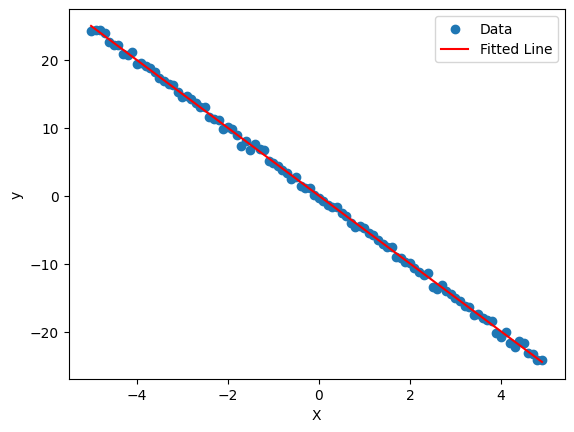

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * X + 0.4 * torch.randn(X.size())

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot results
plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(X.numpy(), model(X).detach().numpy(), color='r', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#Keras

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


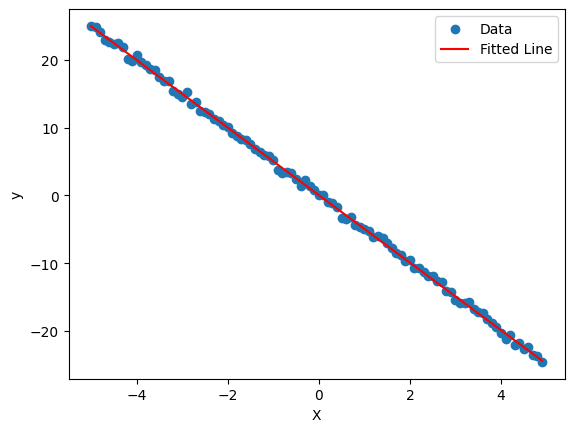

Final loss: 0.1569


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = tf.range(-5, 5, 0.1)
y = -5 * X + 0.4 * tf.random.normal(X.shape)

# Reshape X to have a second dimension
X = tf.reshape(X, (-1, 1))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# Plot results
plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(X.numpy(), model.predict(X), color='r', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print final loss
print(f'Final loss: {history.history["loss"][-1]:.4f}')


#Low-level Tensorflow

Epoch [10/100], Loss: 13.3645
Epoch [20/100], Loss: 0.5366
Epoch [30/100], Loss: 0.2018
Epoch [40/100], Loss: 0.1928
Epoch [50/100], Loss: 0.1923
Epoch [60/100], Loss: 0.1922
Epoch [70/100], Loss: 0.1921
Epoch [80/100], Loss: 0.1920
Epoch [90/100], Loss: 0.1920
Epoch [100/100], Loss: 0.1919


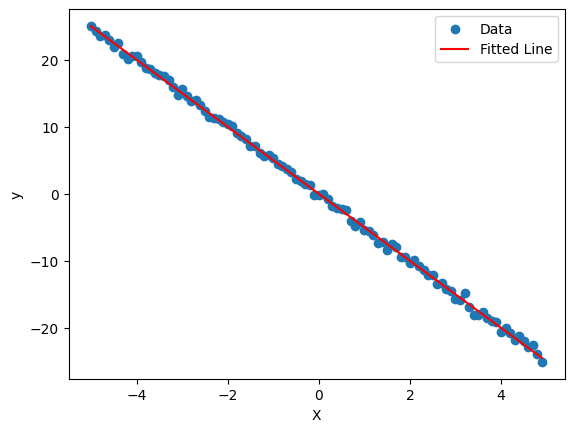

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = tf.range(-5, 5, 0.1)
y = -5 * X + 0.4 * tf.random.normal(X.shape)

# Reshape X and y to have a second dimension
X = tf.reshape(X, (-1, 1))
y = tf.reshape(y, (-1, 1))

# Define the model
class LinearRegression(tf.Module):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.normal([1, 1]))
        self.b = tf.Variable(tf.zeros([1]))

    def __call__(self, x):
        return tf.matmul(x, self.w) + self.b

# Initialize model and optimizer
model = LinearRegression()
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.reduce_mean(tf.square(y_pred - y))

    # Compute gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Update model parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.numpy():.4f}')

# Plot results
plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(X.numpy(), model(X).numpy(), color='r', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
